# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 9 de octubre, 2020 23:59
</div>

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [2]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=1000, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
        return(self.beta)
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [3]:
from sympy import *

In [4]:
m=Symbol('m')
i=Symbol('i')
X=IndexedBase('x')
Y=IndexedBase('y')
B0=Symbol('beta_0')
B1=Symbol('beta_1')
J=Function('J')(B0,B1)


In [5]:
#Se programa la función a derivar
J=(1/(2*m))*Sum((Y[i]-B0-(B1*X[i]))**2,(i,1,m))
#Se deriva respecto a las Betas y se simplifica 
dB0=simplify(diff(J,B0))
dB1=simplify(diff(J,B1))

In [6]:
J

Sum((-beta_0 - beta_1*x[i] + y[i])**2, (i, 1, m))/(2*m)

In [7]:
Derivada0=Eq(Derivative(J,B0),dB0)
Derivada0

Eq(Derivative(Sum((-beta_0 - beta_1*x[i] + y[i])**2, (i, 1, m))/(2*m), beta_0), Sum(beta_0 + beta_1*x[i] - y[i], (i, 1, m))/m)

In [8]:
Derivada1=Eq(Derivative(J,B1),dB1)
Derivada1

Eq(Derivative(Sum((-beta_0 - beta_1*x[i] + y[i])**2, (i, 1, m))/(2*m), beta_1), Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/m)

Lo cual demuestra la igualdad, pues 

$$
\hat{y}(x^{(i)}) = \mathbf\beta_0 + \mathbf\beta_1 \textbf{x}
$$

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 


In [9]:
#Se importan los datos
Edad=np.loadtxt('edad.dat')
Altura=np.loadtxt('altura.dat')

#Se calcula la funcion J
def J(Beta0,Beta1,Edad,Altura):
    costo=0
    for m in range(0,len(Altura)):
        costo=costo+((Altura[m]-Beta0-Beta1*Edad[m])**2/(2*len(Altura)))
    return costo

#Definimos las betas y sacamos el costo con la función anterios
beta0=np.arange(-2,2,.001)
beta1=np.arange(-1,1.5,.001)
Beta0,Beta1=np.meshgrid(beta0,beta1)
Costo=J(Beta0,Beta1,Edad,Altura)

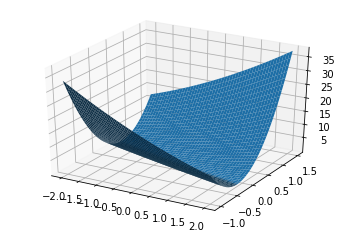

In [10]:
#Hacemos la gráfica en 3D
graf=plt.figure()
M=graf.add_subplot(1,1,1, projection='3d')
M.plot_surface(Beta0,Beta1,Costo)

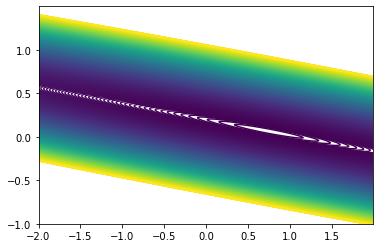

In [11]:
#Hacemos la gráfica de contorno
plt.contour(Beta0,Beta1,Costo, levels=np.arange(0,10,.01))

In [12]:
#Otra forma de graficar un poco más rápida, representa la misma gráfica pero con 'Zoom'
b0=Symbol('b0')
b1=Symbol('b1')
#Se obtienen los valores de la función de costo en la variable z
ContornoZ=np.zeros((25,25))
J=0

for x,y in zip(Edad,Altura):
    J+=1/(2*len(Edad))*(y-b0-b1*x)**2

for i,x in enumerate(np.linspace(-1,1,25)):
    for j,y in enumerate(np.linspace(-1,1,25)):
     
        z=float(J.subs({'b0':x,'b1':y}))
        ContornoZ[j,i]=z

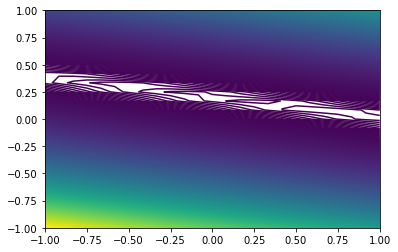

In [13]:
plt.contour(np.linspace(-1,1,25),np.linspace(-1,1,25),ContornoZ, levels=1000, zorder=-1)

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.



La función convergió con beta: [0.69583921 0.07376462] en la iteración 822


Text(0, 0.5, 'Altura (m)')

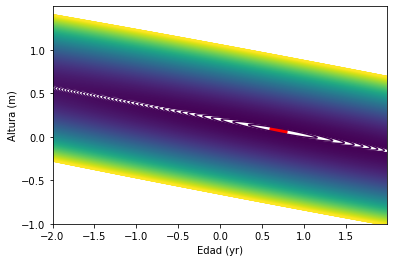

In [14]:
#Se usará la misma alpha que en el ejercicio 3
r = RegresionLineal(alpha=0.03, max_iters=100000, tols=0.000001)
a=r.gradientDescent(Edad, Altura)
a

plt.contour(Beta0,Beta1,Costo, levels=np.arange(0,10,.01))
plt.scatter(a[0],a[1],300,color='r')
plt.xlabel('Edad (yr)')
plt.ylabel('Altura (m)')

La función convergió con beta: [0.69583921 0.07376462] en la iteración 822


Text(0, 0.5, 'Altura (m)')

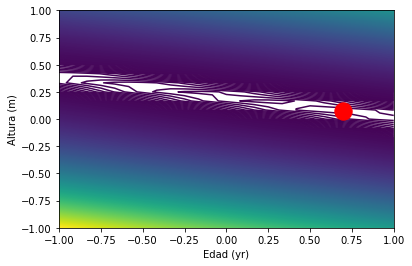

In [15]:
#Otra forma de graficar (Más rápida y con 'zoom')
r = RegresionLineal(alpha=0.03, max_iters=100000, tols=0.000001)
a=r.gradientDescent(Edad, Altura)
a
plt.contour(np.linspace(-1,1,25),np.linspace(-1,1,25),ContornoZ, levels=1000, zorder=-1)
plt.scatter(a[0],a[1],300,color='r')
plt.xlabel('Edad (yr)')
plt.ylabel('Altura (m)')

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.



In [37]:
def ContornoIteraciones(r,iteracion):
    # Gráfica de contorno
    plt.contour(np.linspace(-1,1,25),np.linspace(-1,1,25),ContornoZ, levels=1000, zorder=-1)
    #Iteración
    if iteracion >= len(r.historia['beta']):
        iteracion= len(r.historia['beta'])-1
    beta0=r.historia['beta'][iteracion][0]
    beta1=r.historia['beta'][iteracion][1]
    plt.scatter(beta0,beta1,300,color='r')
    plt.show()

In [38]:
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.000001)
r.gradientDescent(Edad,Altura)

#Aplicamos 

interact(ContornoIteraciones,r=fixed(r),iteracion=(0,4549,1))

La función convergió con beta: [0.69583921 0.07376462] en la iteración 822


interactive(children=(IntSlider(value=2274, description='iteracion', max=4549), Output()), _dom_classes=('widg…

<function __main__.ContornoIteraciones(r, iteracion)>

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [18]:
def plotModelo2(x,y,iteracion,alpha):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    rl=RegresionLineal(alpha, max_iters=10000, tols=0.000001)
    rl.gradientDescent(x,y)
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_title('Edad vs Altura')
    ax[0].set_ylabel('Altura (M)')
    ax[0].set_xlabel('Edad')
    ax[0].legend(loc="best")

    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

### Usar alpha=.04 y una iteracion>600

In [19]:
interact(plotModelo2, x=fixed(Edad), y=fixed(Altura), iteracion=(0,700,10), alpha=(0,.1,.0001))


interactive(children=(IntSlider(value=350, description='iteracion', max=700, step=10), FloatSlider(value=0.05,…

<function __main__.plotModelo2(x, y, iteracion, alpha)>

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [20]:
%cat Clases/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


In [21]:
archivo=open('chirps.txt')
cricris=[]
temp=[]
#Leemos el archivo con todo y títulos
for linea in archivo:
    a=linea.split('\t')
    cricris.append((a[0])) 
    temp.append((a[1]))
#Quitamos los titulos
temp=temp[1:]   
cricris=cricris[1:]
#Convertimos en float cada entrada
for i in range(len(cricris)):
    cricris[i]=float(cricris[i])
    temp[i]=float(temp[i])
#Convertimos las lista en arreglos
X=np.array(cricris)
Y=np.array(temp)


Text(0.5, 0, 'Cris por segundo')

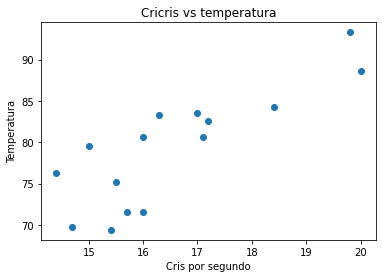

In [22]:
plt.scatter(X,Y, label="data")
plt.title('Cricris vs temperatura')
plt.ylabel('Temperatura')
plt.xlabel('Cris por segundo')

In [23]:
#Aplicamos la regresión lineal
#Escogemos una alpha bastante pequeño 
r = RegresionLineal(alpha=0.003, max_iters=10000000, tols=0)
r.gradientDescent(X, Y)

La función convergió con beta: [22.84871924  3.41033872] en la iteración 384673


array([22.84871924,  3.41033872])

In [24]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_title('Cricris vs Temperatura')
    ax[0].set_ylabel('Temperatura (°F)')
    ax[0].set_xlabel('Cricris por segundo')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [25]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModelo, x=fixed(X), y=fixed(Y), rl=fixed(r), iteracion=(0,ultima_iteracion,1));

interactive(children=(IntSlider(value=192336, description='iteracion', max=384672), Output()), _dom_classes=('…

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

### Respuesta:
#### Llegué a un alpha=0.003 con prueba y error, esta es una buena alpha para avanzar y tener buena precisión. Si el alpha era más grande la función podía no converger y se entraría en un loop en el que no se converge. 
### Los datos SÍ coinciden por completo con los motrados en la página web pero son bastantes cercanos, ya que la pendiente es de 3.41 que es igual a la de la página web y el valor de b es 22.85; sin embargo, se tuvieron que hacer varias iteraciones para poder llegar a estos valores


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [26]:
C1x=np.array([10,8,13,9,11,14,6,4,12,7,5])
C1y=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
C2x=np.array([10,8,13,9,11,14,6,4,12,7,5])
C2y=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
C3x=np.array([10,8,13,9,11,14,6,4,12,7,5])
C3y=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
C4x=np.array([8,8,8,8,8,8,8,19,8,8,8])
C4y=np.array([6.58,5.76,7.71,8.84,8.47,7.08,5.25,12.5,5.56,7.91,6.89])

def plotModelo(x,y,rl,iteracion,a):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].set_title(a)
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_ylabel('Y')
    ax[0].set_xlabel('X')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

La función convergió con beta: [0.09213854 0.77768274] en la iteración 4724


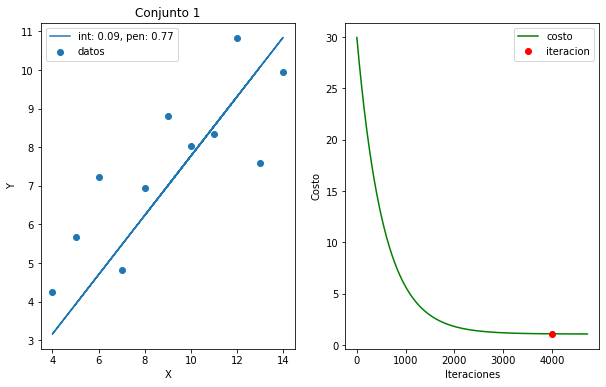

In [27]:
#Cuarteto 1
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C1x, C1y)
plotModelo(C1x,C1y, r, 4000,'Conjunto 1')

La función convergió con beta: [0.09214178 0.77767265] en la iteración 4724


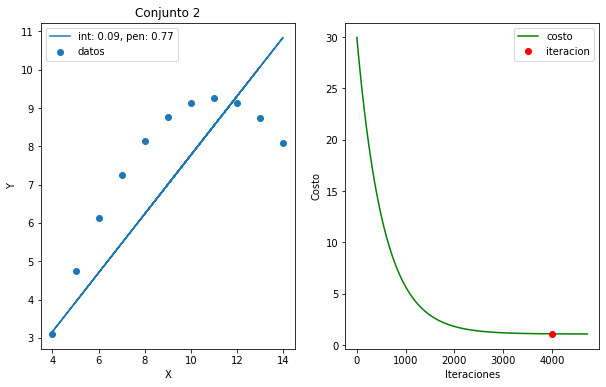

In [28]:
#Cuarteto 2
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C2x, C2y)
plotModelo(C2x,C2y, r, 4000,'Conjunto 2')

La función convergió con beta: [0.09213408 0.77754575] en la iteración 4723


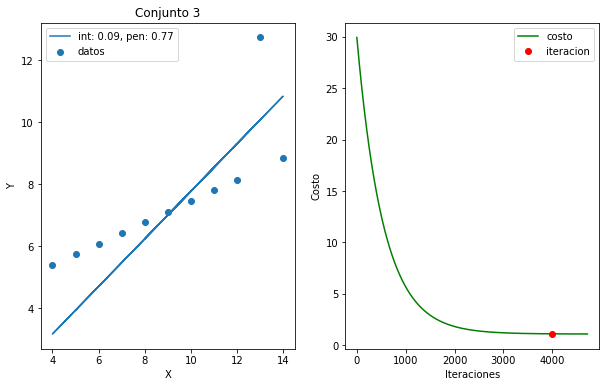

In [29]:
#Cuarteto 3
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C3x, C3y)
plotModelo(C3x,C3y, r, 4000,'Conjunto 3')

La función convergió con beta: [0.09221132 0.77797234] en la iteración 4724


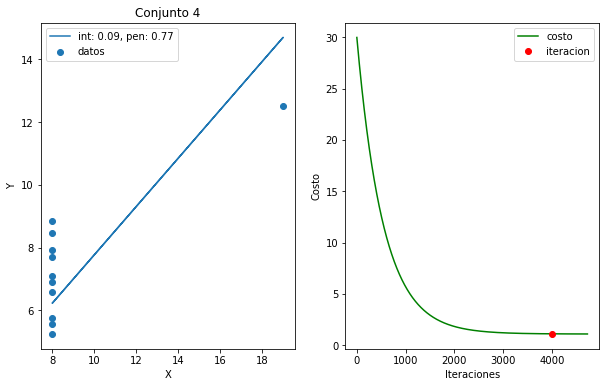

In [30]:
#Cuarteto 4
r = RegresionLineal(alpha=0.00001, max_iters=10000000, tols=0.00001)
r.gradientDescent(C4x, C4y)
plotModelo(C4x,C4y, r, 4000,'Conjunto 4')

### Lo que sucede con estos conjuntos de datos es que todos regresan practicamente la misma regresión lineal a pesar de ser muy distintos.

## Problema 5

Use el archivo `radioactive_decay.dat`

In [31]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0.5, 0, 'Tiempo')

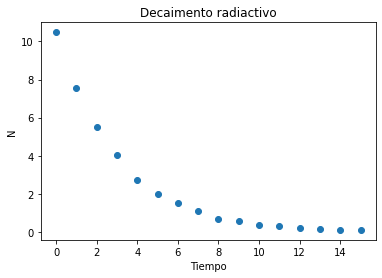

In [32]:
archivo=open('radioactive_decay.txt')
tiempo=[]
n=[]
#Leeemos la primera linea y la ignoramos
archivo.readline()
#Leeemos el resto de los datos
for linea in archivo:
    a=linea.split('\t')
    tiempo.append((a[0])) 
    n.append((a[1]))

#Convertimos en float cada entrada
for i in range(len(n)):
    tiempo[i]=float(tiempo[i])
    n[i]=float(n[i])
#Convertimos las lista en arreglos
X=np.array(tiempo)
Y=np.array(n)

plt.scatter(X,Y, label="data")
plt.title('Decaimento radiactivo')
plt.ylabel('N')
plt.xlabel('Tiempo')

El conjunto de datos tiene forma de la función y=a*e^-x

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

Text(0.5, 0, 'Tiempo')

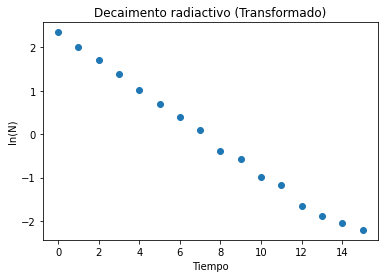

In [33]:
#Podría obtenerse el logaritmo natural de los valores de n para poder linealizar los datos
MY=np.zeros(len(Y))
for i in range(len(Y)):
    MY[i]=ln(Y[i])

arreglo=np.zeros((2,len(X)))
arreglo[0]=X
arreglo[1]=MY
np.savetxt('transform_radioactive_decay.txt',arreglo)
plt.scatter(X,MY, label="data")
plt.title('Decaimento radiactivo (Transformado)')
plt.ylabel('ln(N)')
plt.xlabel('Tiempo')

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [34]:
def plotModeloZ(x,y,rl,iteracion,a):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].set_title(a)
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_ylabel('N (Transformada)')
    ax[0].set_xlabel('Tiempo')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [35]:
arr=np.loadtxt('transform_radioactive_decay.txt')
x=arr[0]
y=arr[1]
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.000001)
r.gradientDescent(x, y)
#plotModelo(x,y, r, 2000,'Decaimiento Radioactivo Tansformado')
a='Deacaimiento Radioactivo Tansformado'
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

interact(plotModeloZ, x=fixed(x), y=fixed(y), rl=fixed(r), iteracion=(0,ultima_iteracion,1), a=fixed(a));

La función convergió con beta: [ 2.2297646  -0.31015622] en la iteración 4342


interactive(children=(IntSlider(value=2170, description='iteracion', max=4341), Output()), _dom_classes=('widg…

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [36]:
r.gradientDescent(x, y)

La función convergió con beta: [ 2.2297646  -0.31015622] en la iteración 4342


array([ 2.2297646 , -0.31015622])

El espacio que se mantiene sin transformar es el eje de las x que representa el tiempo, pues el decaimiento es el que depende del tiempo.